# K近邻算法
- 根据周围点的标签，投票确定给定点的标签值
## 算法步骤
1. 计算当前已知类别数据集中的点与当前点之间的距离
2. 按照距离递增次序排序
3. 选取与目标点最近的**K**个点
4. 统计k个点中类别出现的频率
5. 返回频率最高的类别作为当前点的预测类别
## 代码实现
1. 构建原始数据集

In [7]:
import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

In [9]:
rowdata={'电影名称':['无问西东','后来的我们','前任3','红海行动','唐人街探案','战狼2'],
         '打斗镜头':[1,5,12,108,112,115],
         '接吻镜头':[101,89,97,5,9,8],
         '电影类型':['爱情片','爱情片','爱情片','动作片','动作片','动作片']
        }
movie_data=pd.DataFrame(rowdata)
movie_data


,电影名称,打斗镜头,接吻镜头,电影类型
0,无问西东,1,101,爱情片
1,后来的我们,5,89,爱情片
2,前任3,12,97,爱情片
3,红海行动,108,5,动作片
4,唐人街探案,112,9,动作片
5,战狼2,115,8,动作片


2. 计算已知数据点和当前点的距离

In [19]:
new_data=[24,67]
mines= (movie_data.iloc[:6,1:3]-new_data)**2
mines
#dist

,打斗镜头,接吻镜头
0,529,1156
1,361,484
2,144,900
3,7056,3844
4,7744,3364
5,8281,3481


In [18]:
summines=mines.sum(1)
summines

0     1685
1      845
2     1044
3    10900
4    11108
5    11762
dtype: int64

In [21]:
dist=list(summines**0.5)
dist

[41.048751503547585,
 29.068883707497267,
 32.31098884280702,
 104.4030650891055,
 105.39449701004318,
 108.45275469069469]

3. 距离进行升序培训，选出k个点


In [22]:
distframe=pd.DataFrame({'dist':dist,'labels':movie_data.iloc[:6,3]})
sorteddist=distframe.sort_values(by='dist')[:4]
sorteddist


,dist,labels
1,29.068884,爱情片
2,32.310989,爱情片
0,41.048752,爱情片
3,104.403065,动作片


4. 确定前k个点所在类别出现的频率

In [26]:
re=sorteddist.loc[:,'labels'].value_counts()
re


爱情片    3
动作片    1
Name: labels, dtype: int64

5. 赋值类别

In [28]:
result=[]
result.append(re.index[0])
result

['爱情片']

6. 封装函数

In [35]:
def classify(rowdata,testdata,k):
    result=[]
    #计算dataset中的点和testdata中点之间的距离
    dataset=pd.DataFrame(rowdata)
    distance= (((dataset.iloc[:,1:3]-new_data)**2).sum(1))**0.5
    distlabelframe=pd.DataFrame({'dist':distance,'labels':dataset.iloc[:,3]})
    #排序
    sorteddist=distlabelframe.sort_values(by='dist')[:k]
    #统计类别的频数
    re=sorteddist.loc[:,'labels'].value_counts()
    result.append(re.index[0])
    return result


In [ ]:
result= classify(movie_data,new_data,3)
res

## 约会网站的分类效果

1. 读入数据

In [39]:
datingTest= pd.read_table("datingTestSet.txt",header=None)
datingTest.head()

,0,1,2,3
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike


2. 分析数据


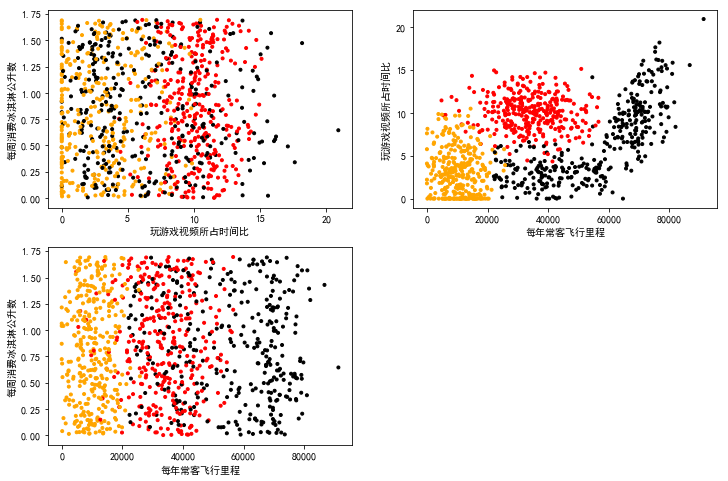

In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt

colors=[]
#根据喜欢程度的不同赋予不同的颜色
for i in range(datingTest.shape[0]):
    m=datingTest.iloc[i,-1]
    color='white'
    if(m=='didntLike'):
        color='black'
    if(m=='smallDoses'):
        color='orange'
    if(m=='largeDoses'):
        color='red'
    colors.append(color)
# 绘制散点图
plt.rcParams['font.sans-serif']=['Simhei'] #字体设置为黑体，缺失该句，就无法显示中文
pl=plt.figure(figsize=(12,8))
fig1=pl.add_subplot(221)
plt.scatter(datingTest.iloc[:,1],datingTest.iloc[:,2],marker='.',color=colors)
plt.xlabel('玩游戏视频所占时间比')
plt.ylabel('每周消费冰淇淋公升数')


fig2=pl.add_subplot(222)
plt.scatter(datingTest.iloc[:,0],datingTest.iloc[:,1],marker='.',color=colors)
plt.xlabel('每年常客飞行里程')
plt.ylabel('玩游戏视频所占时间比')


fig2=pl.add_subplot(223)
plt.scatter(datingTest.iloc[:,0],datingTest.iloc[:,2],marker='.',color=colors)
plt.xlabel('每年常客飞行里程')
plt.ylabel('每周消费冰淇淋公升数')

plt.show()





3. 数值归一化

In [52]:

"""
归一化
"""
def minmax(dataset):
    minDf=dataset.min()
    maxDf=dataset.max()
    normalset=(dataset-minDf)/(maxDf-minDf)
    return normalset

datingT= pd.concat([minmax(datingTest.iloc[:,:3]),datingTest.iloc[:,3]],axis=1)
#datingT
#valueset=datingTest.iloc[:,:3]
#mindef=valueset.min()




,0,1,2
0,40920.0,8.326976,0.952796
1,14488.0,7.153469,1.672748
2,26052.0,1.441871,0.803968
3,75136.0,13.147394,0.427808
4,38344.0,1.669788,0.133140
5,72993.0,10.141740,1.031799
6,35948.0,6.830792,1.212036
7,42666.0,13.276369,0.542724
8,67497.0,8.631577,0.748122
9,35483.0,12.273169,1.506897


In [54]:
"""
切分训练集和测试集
"""
def randSplit(dataset,rate=0.9):
    n=dataset.shape[0]
    m=int(n*rate)
    train=dataset.iloc[:m,:]
    test=dataset.iloc[m:,:]
    test.index=range(test.shape[0])
    return train,test

In [64]:
def datingClass(train,test,k):
    n=train.shape[1]-1
    m=test.shape[0]
    result=[]
    for i in range(m):
        #计算数据和样本集的距离
        distance=((((train.iloc[:,:n]-test.iloc[:,:n])**2).sum(1))**0.5)
        labeldist=pd.DataFrame({'dist':distance,'labels':train.iloc[:,n]})
        #排序并取前k个
        kneardist= labeldist.sort_values(by='dist')[:k]
        re=kneardist.loc[:,'labels'].value_counts()
        result.append(re.index[0])

    result=pd.Series(result)
    test['predict'] =result
    #预测准确率
    accuracy=(test.iloc[:,-1]==test.iloc[:,-2]).mean()
    print(f'模型预测准确率为{accuracy}')
    return test


In [66]:
train,test= randSplit(datingTest,0.9)
datingClass(train,test,5)

模型预测准确率为0.3


,0,1,2,3,predict
0,46893,3.562976,0.445386,didntLike,didntLike
1,8178,3.230482,1.331698,smallDoses,didntLike
2,55783,3.612548,1.551911,didntLike,didntLike
3,1148,0.000000,0.332365,smallDoses,didntLike
4,10062,3.931299,0.487577,smallDoses,didntLike
5,74124,14.752342,1.155160,didntLike,didntLike
6,66603,10.261887,1.628085,didntLike,didntLike
7,11893,2.787266,1.570402,smallDoses,didntLike
8,50908,15.112319,1.324132,largeDoses,didntLike
9,39891,5.184553,0.223382,largeDoses,didntLike


In [67]:
range(10)

range(0, 10)